Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

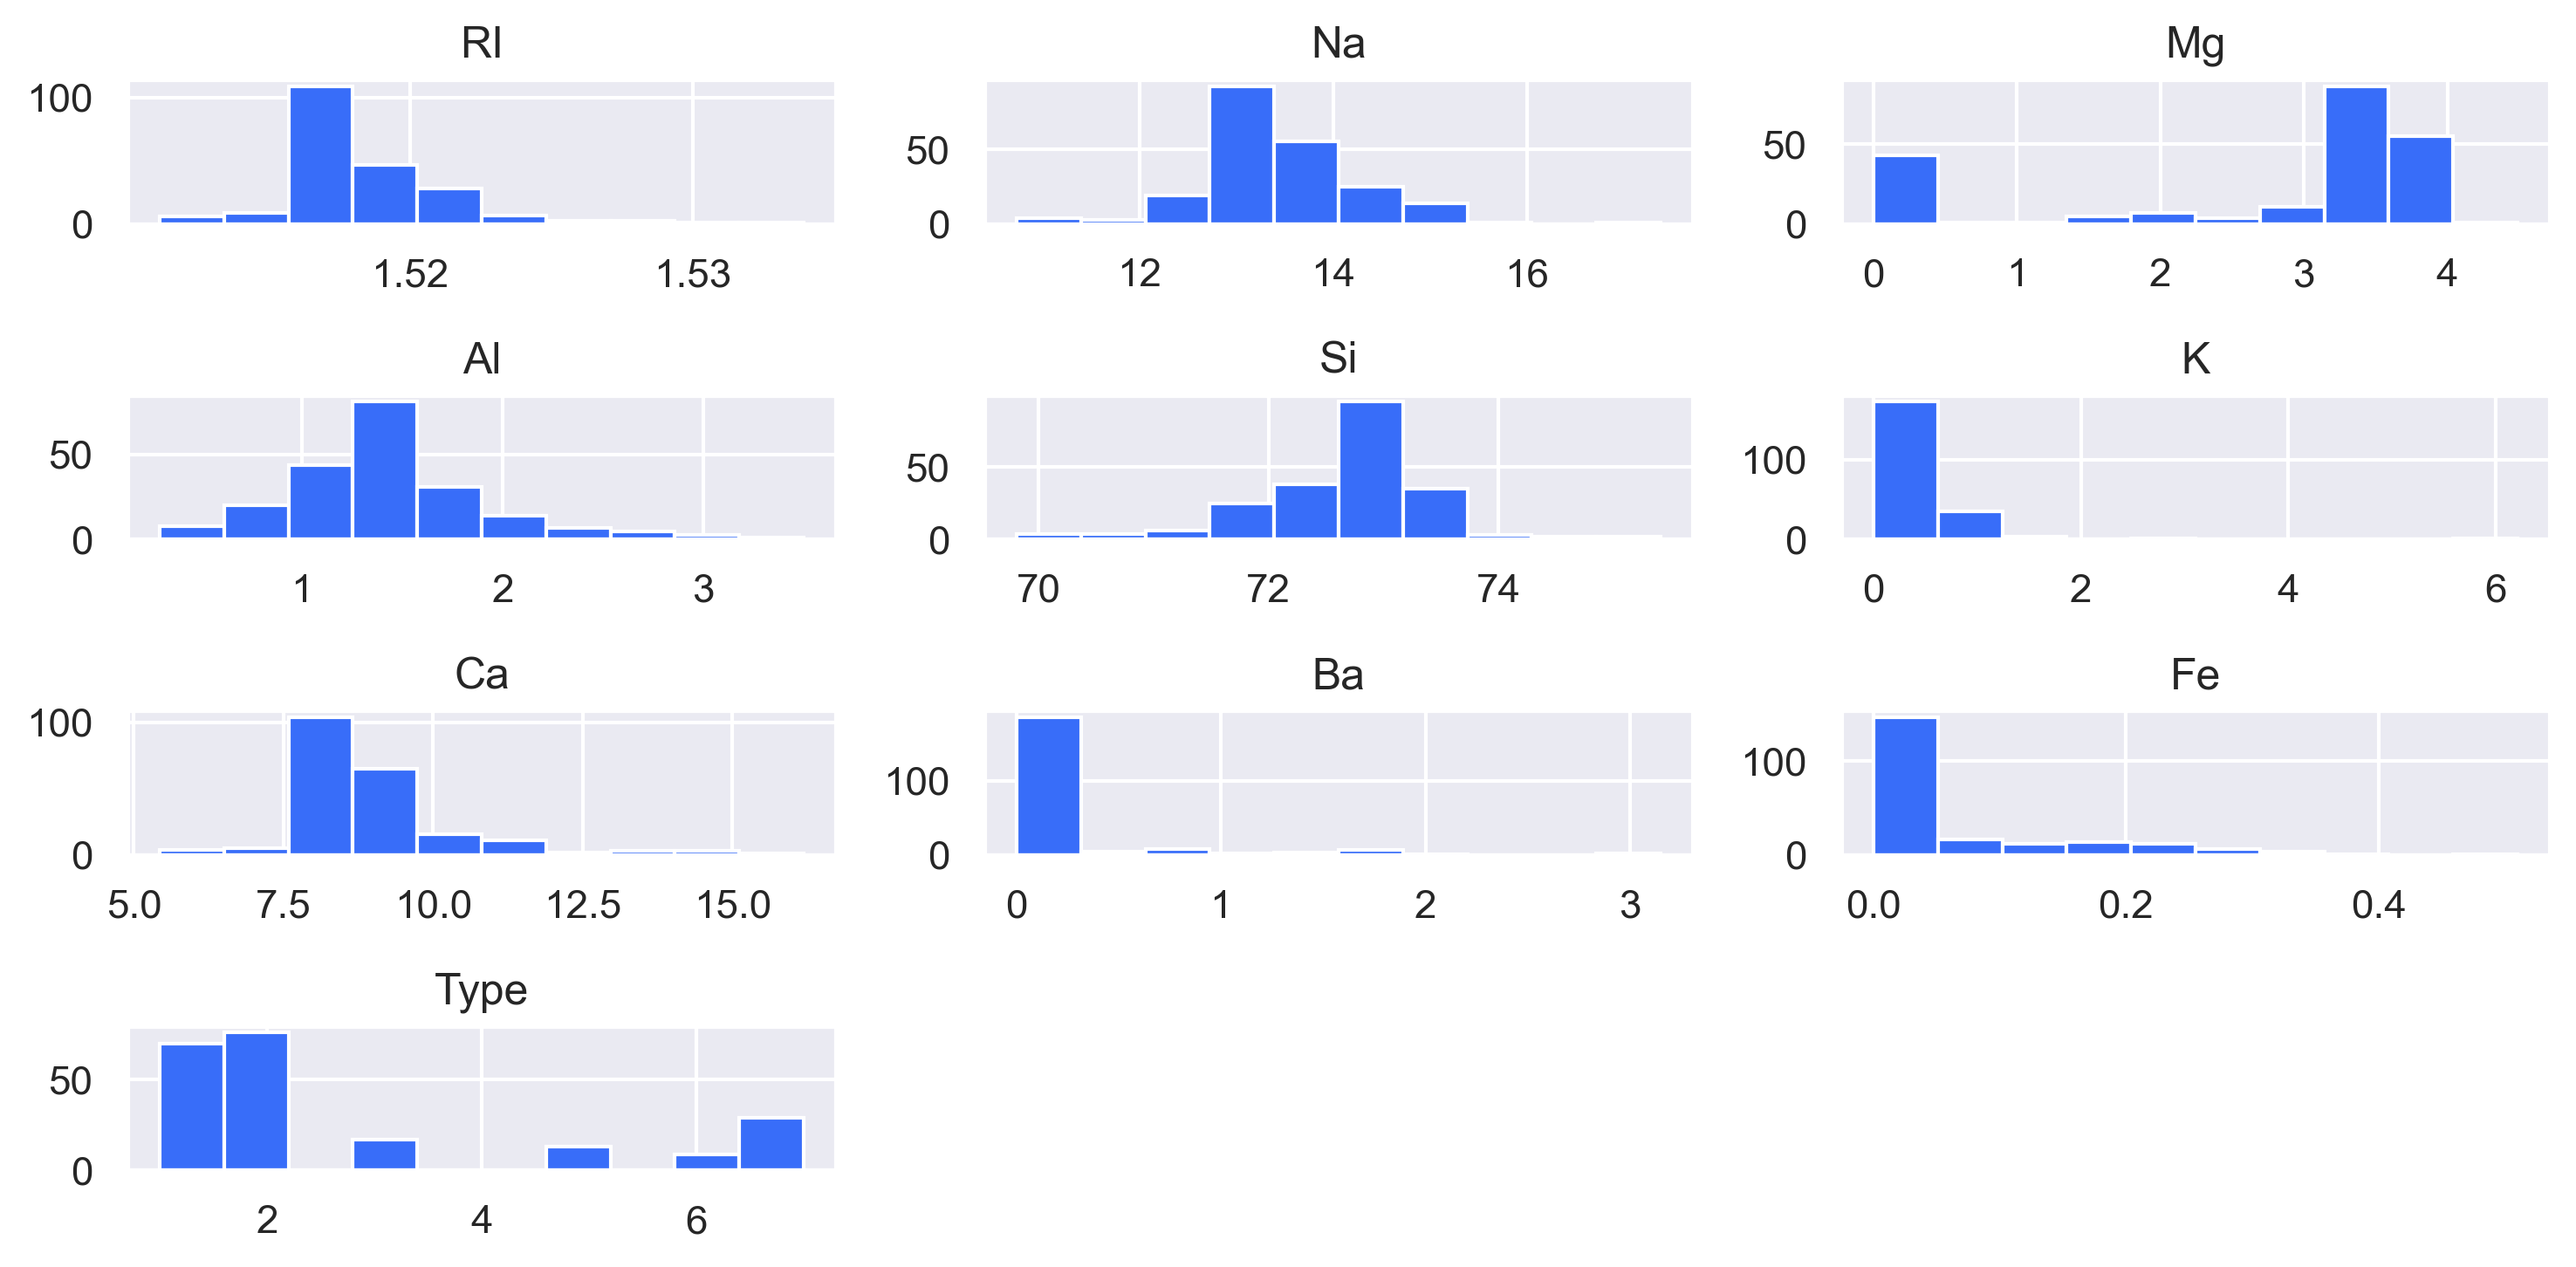

In [6]:
df.hist()
plt.tight_layout()

In [7]:
x = df.iloc[:,:-1]
y = df['Type']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)


In [12]:
ypred

array([6, 7, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
       2, 1, 1, 1, 2, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 7],
      dtype=int64)

In [13]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8187134502923976, 0.6976744186046512)

# Hyperparameter Tuning for knn

In [14]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))


In [15]:
train_acc

[1.0,
 0.8362573099415205,
 0.8187134502923976,
 0.783625730994152,
 0.7485380116959064,
 0.7426900584795322,
 0.7017543859649122,
 0.6900584795321637,
 0.6432748538011696,
 0.6432748538011696,
 0.6374269005847953,
 0.631578947368421,
 0.6374269005847953,
 0.631578947368421,
 0.631578947368421,
 0.6374269005847953,
 0.631578947368421,
 0.631578947368421,
 0.6257309941520468]

In [16]:
test_acc

[0.7209302325581395,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.7209302325581395,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.6046511627906976,
 0.6046511627906976,
 0.5813953488372093,
 0.6046511627906976,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745]

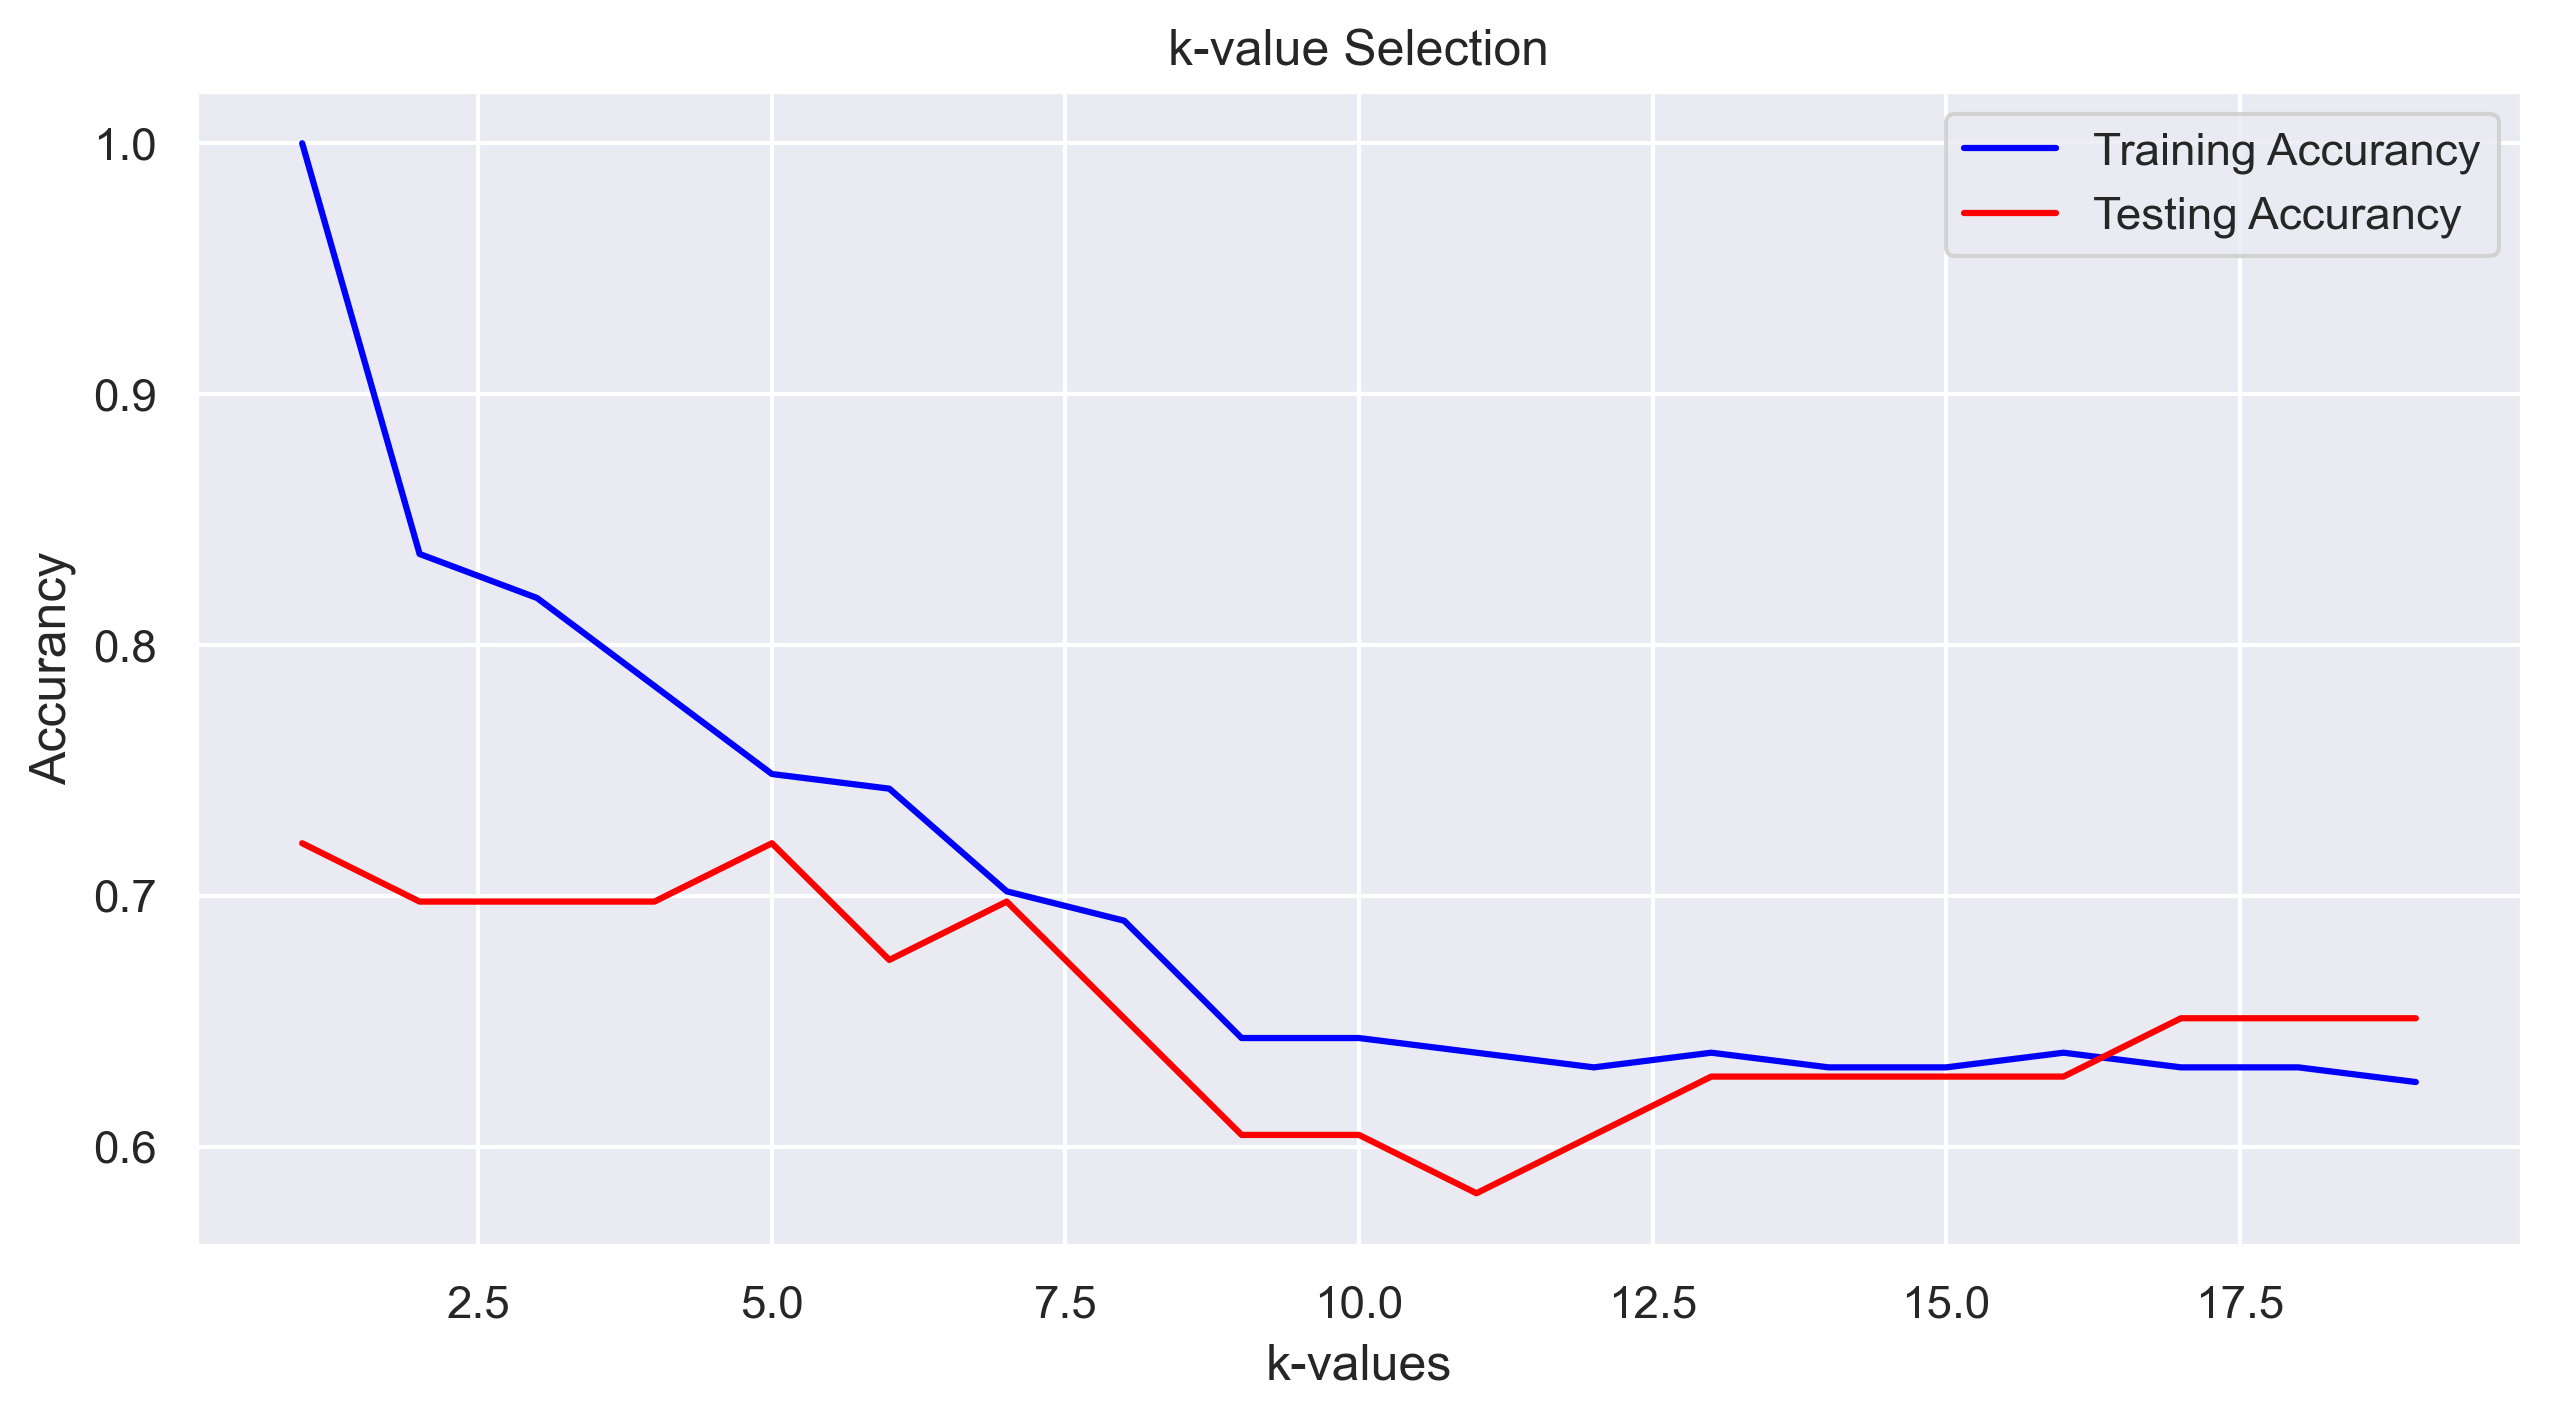

In [17]:
plt.plot(range(1,20),train_acc, color = 'blue', label = 'Training Accurancy')
plt.plot(range(1,20),test_acc, color = 'red', label = 'Testing Accurancy')
plt.xlabel('k-values')
plt.ylabel('Accurancy')
plt.title('k-value Selection')
plt.legend()

In [21]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain,ytrain)
print(f"Train : {knn.score(xtrain,ytrain)}\nTest : {knn.score(xtest,ytest)}")

Train : 0.6374269005847953
Test : 0.627906976744186


In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.56      0.60      0.58        43
weighted avg       0.60      0.70      0.65        43



In [25]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64